In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker

import cmocean

from plotting import *
from composite_helper_methods import *

In [2]:
#anomaly matrix files: seasonal cycle has been removed
u_anom_file = './data/u_anom_7917.npy'
v_anom_file = './data/v_anom_7917.npy'
t_anom_file = './data/t_anom_7917.npy'

#variable files on disk
lon_file = './data/lon.npy'
lat_file = './data/lat.npy'
p_file = './data/p.npy'
time_file = './data/time.npy'

pc2_filt_file = './data/pc2_filt_all_months.npy'

djf = ', DJF'

#set colormap here
colormap = cmocean.cm.balance

#for plotting
central_lon = -90
lon_list = [90, 120, 150, 180, -150, -120, -90, -60, -30, 0, 30, 60, 90]
lat_list = [-90, -60, -30, 0, 30, 60, 90]

proj = ccrs.PlateCarree(central_longitude=central_lon)
trans = ccrs.PlateCarree()

#plot every n wind vectors
stride = 3

For the most part, this Notebook is similar to that of [`shallow_circ_composite_analysis_tstat.ipynb`](https://github.com/Jakidxav/shallow_tropical_convection/blob/master/shallow_circ_composite_analysis_tstat.ipynb). Here, however, we are plotting the actual temperature and wind structures instead of the t-statistic over a grid.

In [3]:
#read in data files
t_anom = np.load(t_anom_file)
u_anom = np.load(u_anom_file)
v_anom = np.load(v_anom_file)

#load in pc2, subset for shallow idx
pc2_filt = np.load(pc2_filt_file)
shallow_idx2 = np.where(pc2_filt <= -0.012)[0]

#load indexer arrays
lon = np.load(lon_file)
lat = np.load(lat_file)
p = np.load(p_file)
time = np.load(time_file)
dates = pd.to_datetime(time)

In [4]:
#pressure level at which we want to subset
#850:30, 500:21, 200:14
pidx = 14

#we are plotting pc2 composites
pc = 'PC2'

season = djf

#left titles for plotting
#we are doing this after loading in the data so that we can access the pressure array
left_title_idx_t = 'Temperature Anomaly, Shallow Index, {}, {}, {} hPa'.format(pc, season[2:], str(int(p[pidx])))
left_title_idx_wind = 'Wind vector anomalies, Shallow Index, {}, {}, {} hPa'.format(pc, season[2:], str(int(p[pidx])))

#filenmaes for saving
figname_temp = 'temp_shallow_mean_{}_{}_{}'.format(pc, season[2:], str(int(p[pidx])))
figname_wind = 'wind_shallow_mean_{}_{}_{}'.format(pc, season[2:], str(int(p[pidx])))

### Subset for season

In [5]:
#months in djf
months = [12, 1, 2]

#create a time indexer array; we could change the months out for different seasons in the above "months" list
tidx = np.logical_or(dates.month==months[0], np.logical_or(dates.month==months[1], dates.month==months[2]))

#both winter months and threshold values of pc2
djf_and_pc2 = sorted(list(set(shallow_idx2) & set(np.where(tidx)[0])))

In [6]:
#extract dates from variable that match the djf season and pc2 shallow index subset
t_anom_shallow = season_and_threshold(t_anom, djf_and_pc2)
u_anom_shallow = season_and_threshold(u_anom, djf_and_pc2)
v_anom_shallow = season_and_threshold(v_anom, djf_and_pc2)

In [7]:
print(np.shape(t_anom))

(468, 37, 121, 240)


In [8]:
#now average over the time dimension
t_anom_shallow_mean = average_over_dim(t_anom_shallow, 0)
u_anom_shallow_mean = average_over_dim(u_anom_shallow, 0)
v_anom_shallow_mean = average_over_dim(v_anom_shallow, 0)

#create x and y wind components so we can plot them in cartopy
windx, windy = create_wind_vectors(u_anom_shallow_mean, v_anom_shallow_mean, pidx)

#get vmax/min and contours for plotting 
vmint, vmaxt = -1.60, 1.61
cont = np.arange(vmint, vmaxt, 0.01)

In [9]:
print(np.shape(t_anom_shallow_mean))

(37, 121, 240)


/home/jakidxav/anaconda3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1744: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


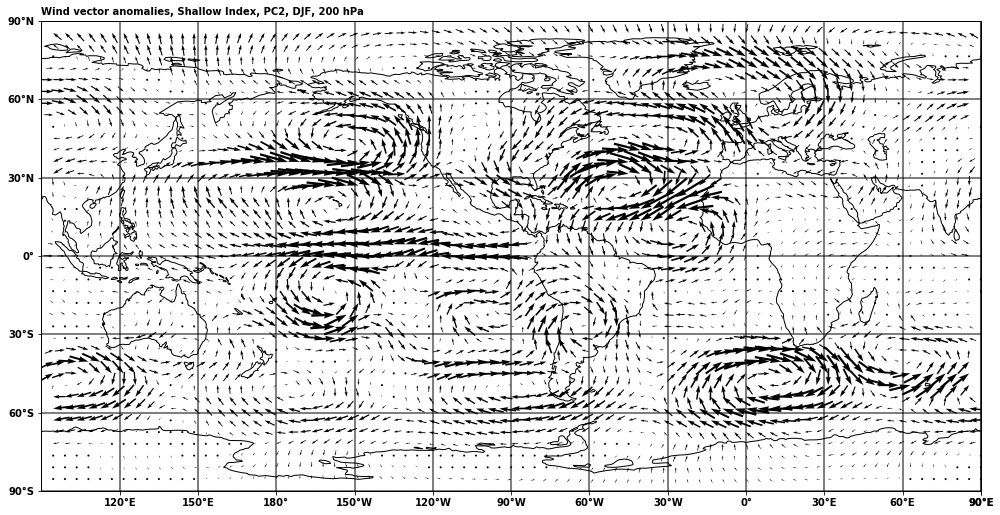

In [10]:
#plot wind vector anomalies at a given pressure level
plot_wind(proj, trans, central_lon, lon, lat, windx, windy, stride, 
          lon_list, lat_list, left_title_idx_wind, '', figname_wind, True)

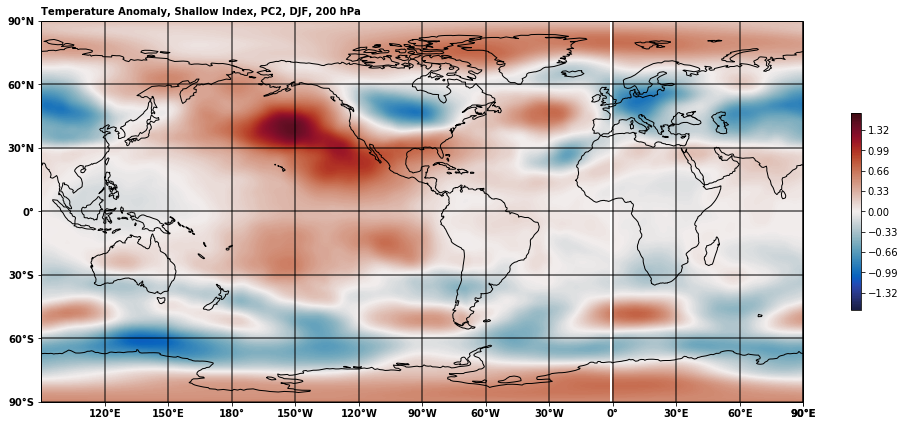

In [11]:
#now let's plot the temperature anomaly at the same pressure level
plot_field(proj, trans, central_lon, lon, lat, t_anom_shallow_mean[pidx], vmint, vmaxt, cont, colormap, 
           lon_list, lat_list, left_title_idx_t, '', figname_temp, True)